In [7]:
import numpy as np
import seaborn as sns
import bokeh
import pandas as pd
import matplotlib.pyplot as plt

            X           Y      Xvel      Yvel
0    0.000000    0.000000  0.000000  0.000000
1  928.385976  440.836107 -5.362956 -1.160292
2  928.378543  440.689662 -5.279977 -1.306313
3  928.553523  440.600239 -5.028592 -1.395489
4  928.892812  440.566609 -4.628488 -1.429047


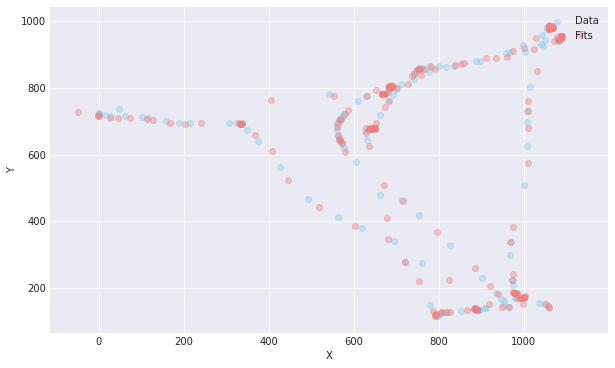

In [10]:
data = pd.read_csv('~/projects/Kalman/dataToFit_train.csv', names=['X','Y','Xvel','Yvel'])
fit = pd.read_csv('~/projects/Kalman/fitsFromModel_train.csv', names=['X','Y','Xvel','Yvel'])
print(fit.head())
idx = [x for x in range(500,750)]
x1 = data.iloc[idx,0:2]
x1_fit = fit.iloc[idx,0:2]
y1 = data.iloc[idx,1]
y1_fit = fit.iloc[idx,1]

fig = plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.regplot('X','Y',data=x1, color="skyblue", fit_reg=False, scatter_kws={'alpha':0.4} ,label="Data")
sns.regplot('X','Y',data=x1_fit, color="lightcoral", fit_reg=False, scatter_kws={'alpha':0.4}, label="Fits")
plt.legend(['Data','Fits'], ncol=1, loc='upper right');
#fig.legend(labels=['Data','Fits'])
plt.show()

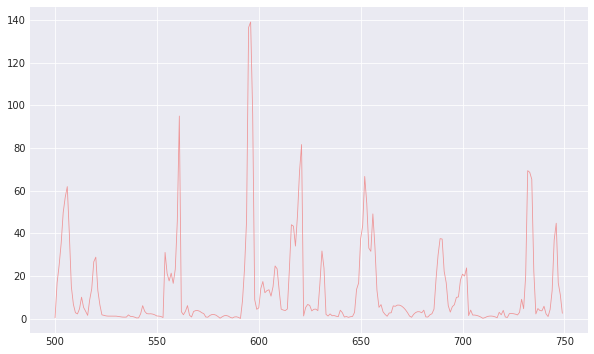

In [11]:
diff_fit = (x1_fit-x1)**2
sse = diff_fit.iloc[:,0]+diff_fit.iloc[:,1]
fig = plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

#sns.pointplot(x=idx,y=diff_fit.iloc[:,0], markers='.', size=0.02)
plt.plot(idx,np.sqrt(sse), color='lightcoral', alpha=0.8, linewidth=0.8)
plt.show()

In [6]:
output_notebook()
p = figure(title="Model predictions v/s data - differences in X")
p.line(range(data.shape[0]), data.iloc[:-1,0]-fit.iloc[1:,0], alpha=0.3)
p1 = figure(title="Model predictions v/s data - differences in Y")
p1.line(range(data.shape[0]), data.iloc[:,1]-fit.iloc[:,1], alpha=0.3)
p2 = figure(title="Model predictions v/s data - differences in Xvel")
p2.line(range(data.shape[0]), data.iloc[:,2]-fit.iloc[:,2], alpha=0.3)

show(column(p,p1,p2))


NameError: name 'output_notebook' is not defined

In [ ]:
No acceleration, zero velocity, transitions

if second derivate gets better